# Severity of fatality prediction through vehicle accidents

Road accidents are very critical and a major problem in todays world. WHO (World Health Organization) had recorded around 1.25 million death in USA alone by motor vehicle. It is necessary to understand the severity of the crashes and anlayze the factors affecting it.This will help us to prevent some crashes in future. Can machine learning help us to predict factors affecting these crashes?

I have taken crash datset of New Zealand from crash analysis system which is easily available in different format and APIs. It has various different variables to consider:
Traffic data
Vehicle data
Road data
Crash data
Weather data

Url: https://opendata-nzta.opendata.arcgis.com/datasets/crash-analysis-system-cas-data/geoservice

I have used Geojson file, instead of the usual CSV file, so that we can perform geographic data analysis without creating geometries from latitude and longitude and deal with coordinate reference systems and projections.

In New Zealand, the total death in car crash accidents since the year 2000, up to 2018 is 6991.
While the total number of serious injuries and minor injuries in car accidents reach 45604, 208623 respectively.

Fatality count is not very high in the data. Mostly consist of major and minor serious injusries.

#### Loading necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import requests
import copy

In [387]:
!pip install folium 
import folium

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
# Get the data from url and request it as json file
url = 'https://opendata.arcgis.com/datasets/a163c5addf2c4b7f9079f08751bd2e1a_0.geojson'
geojson = requests.get(url).json()

In [8]:
# Read the data as GeodataFrame in Geopandas
crs = {'init': 'epsg:3851'} # Coordinate reference system (CRS) for Newzealand
gdf = gpd.GeoDataFrame.from_features(geojson['features'], crs=crs)

In [32]:
df = copy.deepcopy(gdf)

Used deep copy function as I did not want any modification on the original data

In [400]:
from accidentfunc import missing_values, modeling

### Handling Missing Values

In [12]:
missing_values(gdf)

,column name,percent missing %
0,OBJECTID,0.000000
1,OBJECTID_1,0.000000
2,Pedestrian,0.000000
3,advisorySp,0.000000
4,animals,0.000000
5,areaUnitID,0.000000
6,bicycle,0.000000
7,bridge,0.000000
8,bus,0.000000
9,carStation,0.000000


## Data Preprocessing

Prepared and cleaned the data to use it for further analysis

In [54]:
df['crashDirec']= df['crashDirec'].fillna('Unknown')
df['crashRPDir'] = df['crashRPDir'].fillna(0)
df['speedLimit'] = df['speedLimit'].fillna(999)
df['cornerRoad'] = df['cornerRoad'].fillna(0)
df['roadLane'] = df['roadLane'].fillna(999)
df['crashRPSH'] = df['crashRPSH'].fillna(0)
df['crashRPNew'] = df['crashRPNew'].fillna(0)

In [96]:
df['speedLimit']=df['speedLimit'].astype(str).astype(int)
df = df[(df['speedLimit'] != 999.0)]

### Exploratory Data Analysis

In [64]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 674321 entries, 0 to 674320
Data columns (total 89 columns):
OBJECTID              674321 non-null int64
OBJECTID_1            674321 non-null int64
Pedestrian            674321 non-null int64
advisorySp            674321 non-null int64
animals               674321 non-null int64
areaUnitID            674321 non-null int64
bicycle               674321 non-null int64
bridge                674321 non-null int64
bus                   674321 non-null int64
carStation            674321 non-null int64
cliffBank             674321 non-null int64
cornerRoad            674321 non-null float64
crashDirec            674321 non-null object
crashDista            674321 non-null int64
crashFinan            674321 non-null object
crashLoc_1            674321 non-null object
crashLocat            674321 non-null object
crashRPDir            674321 non-null object
crashRPDis            674321 non-null int64
crashRPNew            674321 non-null 

### Crash reports of fatal counts, serious injuries and minor injuries over the years

In [36]:
df.rename(columns = {'seriousInj':'seriousInjuryCount','minorInjur':'minorInjuryCount'}, inplace = True)

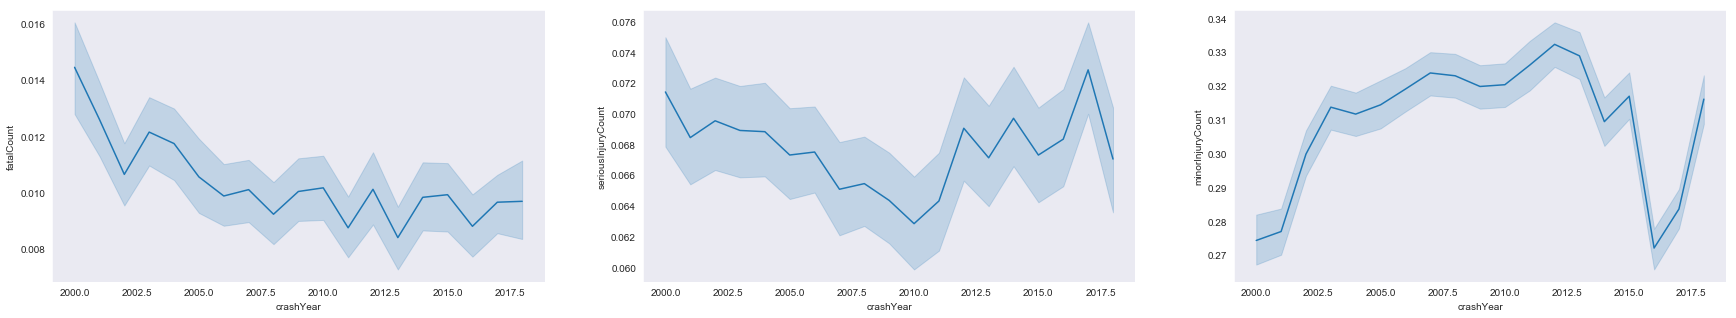

In [122]:
fig, ax = plt.subplots(1, 3, figsize = (30, 5));
sns.set_style("dark")
sns.lineplot(x="crashYear", y="fatalCount",data=df, ax=ax[0]);
sns.lineplot(x="crashYear", y="seriousInjuryCount",data=df, ax=ax[1]);
sns.lineplot(x="crashYear", y="minorInjuryCount",data=df, ax=ax[2]);

In [99]:
year_wise_fatalCounts = df.groupby(['crashYear']).agg({'fatalCount':['sum'],'speedLimit':['min','max']})
year_wise_fatalCounts

fatalCount speedLimit       
                 sum        min    max
crashYear                             
2000             462       10.0  100.0
2001             455       10.0  100.0
2002             405       10.0  100.0
2003             461       10.0  100.0
2004             435       10.0  100.0
2005             405       10.0  100.0
2006             393       10.0  100.0
2007             421       10.0  100.0
2008             365       10.0  100.0
2009             384       10.0  100.0
2010             375       10.0  100.0
2011             284       10.0  100.0
2012             308       10.0  100.0
2013             253       10.0  100.0
2014             293       10.0  100.0
2015             319        5.0  100.0
2016             327       10.0  100.0
2017             378       10.0  110.0
2018             268       10.0  110.0

### Fatality count by Roads

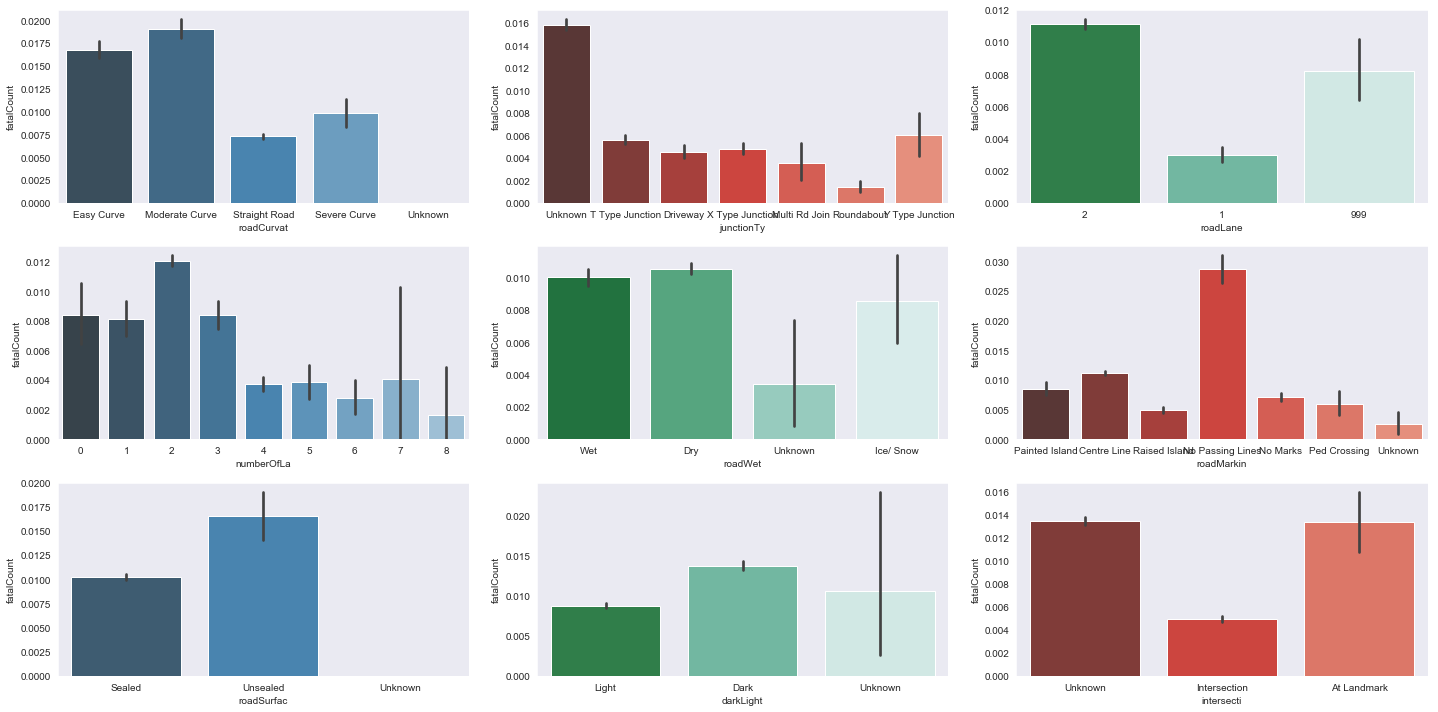

In [150]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10));

sns.barplot(x='roadCurvat',y="fatalCount",data=df,palette="Blues_d", ax=ax[0,0])
sns.barplot(x="junctionTy",y="fatalCount",data=df,palette="Reds_d",  ax=ax[0,1])
sns.barplot(x='roadLane',y="fatalCount",data=df,palette="BuGn_r", ax=ax[0,2])
sns.barplot(x='numberOfLa',y="fatalCount",data=df,palette="Blues_d", ax=ax[1,0])
sns.barplot(x='roadWet',y="fatalCount",data=df,palette="BuGn_r", ax=ax[1,1])
sns.barplot(x='roadMarkin',y="fatalCount",data=df, palette="Reds_d", ax=ax[1,2])
sns.barplot(x='roadSurfac',y="fatalCount",data=df,palette="Blues_d", ax=ax[2,0])
sns.barplot(x='darkLight',y="fatalCount",data=df,palette="BuGn_r", ax=ax[2,1])
sns.barplot(x='intersecti',y="fatalCount",data=df,palette="Reds_d", ax=ax[2,2])
plt.tight_layout()

I have genrated graph in such a way that it could give us clear indications on how diffrent important road parameters can affect accidents. In road lanes, highest is 2 wrt to fatal counts. There is 999 in data which is basically unknown values replaced.

### Fatalities count wrt traffic

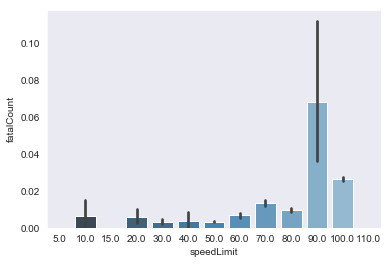

In [271]:
plt.figure(figsize=(8,6))
sns.barplot(x="speedLimit", y="fatalCount",  data=df,palette="Blues_d")

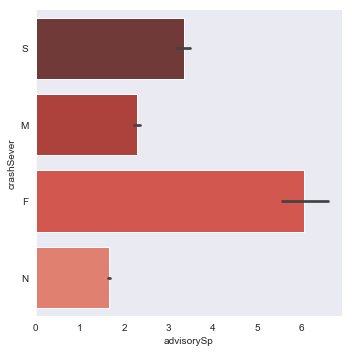

In [273]:
plt.figure(figsize=(8,6))
sns.catplot(x="advisorySp", y="crashSever",data=df, kind='bar',palette="Reds_d",)

Possible values are 'F' (fatal), 'S' (serious), 'M' (minor), 'N' (non-injury).
FatalCount is more wrt speed

### Fatality wrt Weather

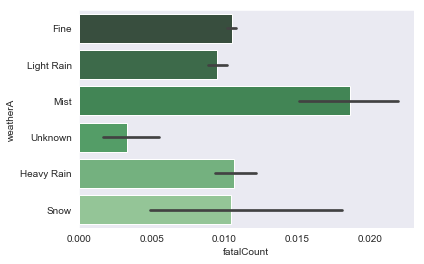

In [276]:
plt.figure(figsize=(8,6))
sns.barplot(x="fatalCount", y="weatherA",data=gdf, palette="Greens_d")

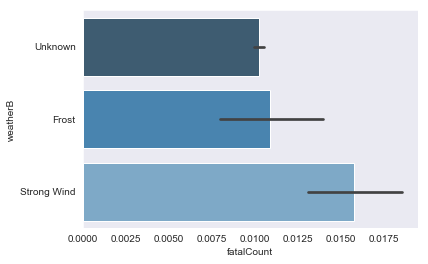

In [278]:
plt.figure(figsize=(8,6))
sns.barplot(x = "fatalCount", y="weatherB",data=gdf, palette="Blues_d")

### Geographic data

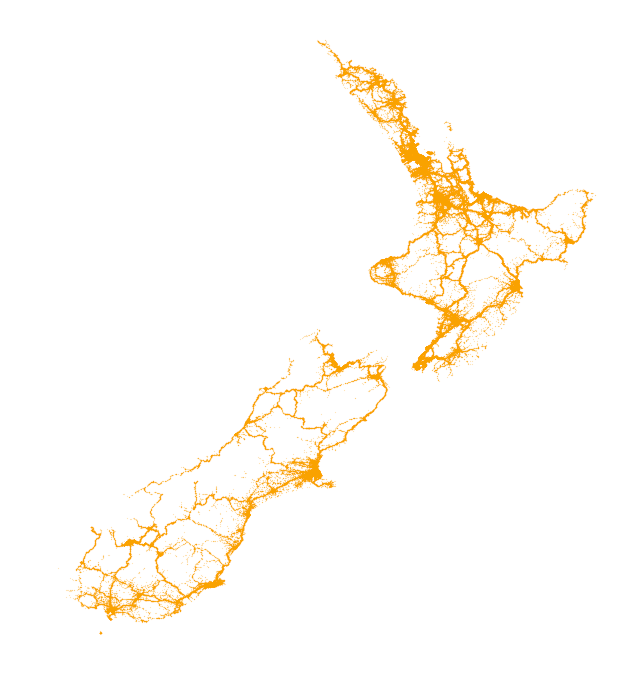

In [160]:
df.plot(markersize=0.01, edgecolor='orange',figsize=(12,12));
plt.axis('off');

#### Let us have a look at crashes aggregated in cluster map in Auckland.


In [142]:
from folium.plugins import MarkerCluster
df_sample = df.sample(5000)
lons = df_sample.geometry.x
lats = df_sample.geometry.y

m = folium.Map(
    location=[np.mean(lats), np.mean(lons)],
    tiles='Cartodb Positron',
    zoom_start=6
)

#FastMarkerCluster(data=list(zip(lats, lons))).add_to(m)
MarkerCluster(list(zip(lats, lons))).add_to(m)

folium.LayerControl().add_to(m)
m

In [237]:
df_sample = df.sample(5000)
lons = df_sample.geometry.x
lats = df_sample.geometry.y
heat_cols = list(zip(lats, lons))
from folium.plugins import HeatMap

m = folium.Map([np.mean(lats), np.mean(lons)], 
               tiles='CartoDB dark_matter', 
               zoom_start=6)

HeatMap(heat_cols).add_to(m)
m

#### The map gives us clear indication on most fatal roads and accidents prone areas which is mostly in cities.

## Machine Learning Model

I have implemented three different model to compare and check the accuracy. Lets see if weather and rest of the parameters affects the results.

We need to convert categorical variable to numerical for regression. I have one hot encoding to do so.

In [288]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [250]:
# Since GeoDataframe and Geometry Column will not work in our analysis therefore, change our data to data frame.
newdf = pd.DataFrame(df.drop(['geometry','OBJECTID','OBJECTID_1'], axis = 1))
newdf.head()

,Pedestrian,advisorySp,animals,areaUnitID,bicycle,bridge,bus,carStation,cliffBank,cornerRoad,...,train,tree,truck,unknownVeh,urban,vanOrUtili,vehicle,waterRiver,weatherA,weatherB
0,0,0,0,527820,0,0,0,1,0,1.0,...,0,1,0,0,Urban,0,0,0,Fine,Unknown
1,0,0,0,527924,0,0,0,1,1,1.0,...,0,0,0,0,Openroad,0,0,0,Fine,Unknown
2,0,0,0,536821,0,0,0,4,0,1.0,...,0,0,0,0,Urban,0,0,0,Light Rain,Unknown
3,0,0,0,538201,0,0,0,3,0,1.0,...,0,0,0,0,Urban,0,0,0,Fine,Unknown
4,0,0,0,542410,0,0,0,1,0,1.0,...,0,0,0,0,Urban,0,0,0,Fine,Unknown


In [251]:
#This converts all string / object type columns to categorical. Then applies codes to each type of category.
for x in newdf:
    if (newdf[x].dtype == 'object'):
        newdf[x]= newdf[x].astype('category')
        newdf[x] = newdf[x].cat.codes


In [388]:
newdf = pd.get_dummies(newdf)
newdf.head(5)

,Pedestrian,advisorySp,animals,areaUnitID,bicycle,bridge,bus,carStation,cliffBank,cornerRoad,...,train,tree,truck,unknownVeh,urban,vanOrUtili,vehicle,waterRiver,weatherA,weatherB
0,0,0,0,527820,0,0,0,1,0,1.0,...,0,1,0,0,1,0,0,0,0,2
1,0,0,0,527924,0,0,0,1,1,1.0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,536821,0,0,0,4,0,1.0,...,0,0,0,0,1,0,0,0,2,2
3,0,0,0,538201,0,0,0,3,0,1.0,...,0,0,0,0,1,0,0,0,0,2
4,0,0,0,542410,0,0,0,1,0,1.0,...,0,0,0,0,1,0,0,0,0,2


### Lets see if the fatalCounts differ wrt to weather conditions

In [259]:
newdf1 = newdf.drop(columns=['weatherA', 'weatherB'])
#we will need to replace NA values here with 999 as the classifier will not accept any NA values
newdf1['speedLimit'] = newdf1['speedLimit'].fillna(999)
newdf['speedLimit'] = newdf['speedLimit'].fillna(999)

In [283]:
Y = newdf.fatalCount.values
Y1 = newdf1.fatalCount.values

In [260]:
X = newdf.loc[:, newdf.columns != 'fatalCount']
X1 = newdf1.loc[:, newdf1.columns != 'fatalCount']
X.columns;

In [432]:
# Split our data into training and testing sets
X_train1, X_test1,Y_train1,Y_test1 = train_test_split(X1, Y1, test_size=0.33, random_state=99)
#Without weather

In [433]:
# Random Forest

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train1, Y_train1)
Y_pred = rf.predict(X_test1)
rf.score(X_train1, Y_train1)
acc_rf1 = round(rf.score(X_test1, Y_test1) * 100, 2)
acc_rf1

99.91

### Function called to check the accuracy of the model

In [382]:
modeling(X,newdf.fatalCount.values,'logistic')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

 Accuracy of Logistic Regression is: 
              precision    recall  f1-score   support

          0       0.99      1.00      1.00    220423
          1       0.00      0.00      0.00      1893
          2       0.00      0.00      0.00       158
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        14
          5       0.00      0.00      0.00         2
          9       0.00      0.00      0.00         1

avg / total       0.98      0.99      0.99    222523



C:\Users\us\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic Regression performs almost the same as RF.

### There is not much on removing the weather conditions. The classification is successful and the accuracy of the model is more or less 99.91% when investigated on multiple metrics. 

In [436]:
f_imp = pd.DataFrame(data={'importance': rf.feature_importances_, 'features': X_train1.columns}).set_index('features')
f_imp = f_imp.sort_values('importance', ascending=False)
f_imp.head(10)

,importance
features,
crashSever,0.758682
seriousInjuryCount,0.012866
easting,0.012534
crashLoc_1,0.012139
northing,0.011800
crashDista,0.010795
meshblockI,0.010619
areaUnitID,0.009471
crashLocat,0.008706


Here are the important factors wrt accidents that we should consider. The results indicated that adding weather-related features to a machine learning algorithm in predicting severity of an accident did not change the accuracy of the model. When adding three features of light condition, weather condition, and the condition of the road surface, the measures of recall, precision, and f1-score remained unchanged.